In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcol

In [2]:
# import the file
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\Telegram Desktop\vinsup\Project\03 Diversity-Inclusion-Dataset.csv")

# Exploration

In [3]:
df.head()

,Employee_ID,Gender,Job_Level_after_FY20_promotions,New_hire_FY20,FY20_Performance_Rating,Promotion_in_FY21,In_base_group_for_Promotion_FY21,Target_hire_balance,FY20_leaver,In_base_group_for_turnover_FY20,...,Promotion_in_FY20,FY19_Performance_Rating,Age_group,Age_01_07_2020,Nationality_1,Region_group_nationality_1,Broad_region_group_nationality_1,Last_hire_date,Years_since_last_hire,Rand
0,1,Male,6 - Junior Officer,N,2.0,No,No,0.5,Yes,Y,...,N,3.0,30 to 39,37,Spain,Europe,Europe,01-04-2017,3,0.207753
1,2,Female,4 - Manager,N,3.0,No,Yes,0.5,No,Y,...,N,NaN,30 to 39,37,Germany,Europe,Europe,01-04-2017,3,0.182412
2,3,Male,2 - Director,N,2.0,No,Yes,0.5,No,Y,...,N,3.0,30 to 39,35,Switzerland,Switzerland,Switzerland,01-04-2015,5,0.127629
3,4,Male,4 - Manager,N,3.0,No,Yes,0.5,No,Y,...,N,3.0,30 to 39,32,Germany,Europe,Europe,01-04-2012,8,0.594148
4,5,Female,6 - Junior Officer,N,2.0,No,Yes,0.5,No,Y,...,N,NaN,20 to 29,28,Switzerland,Switzerland,Switzerland,01-04-2019,1,0.719382


In [4]:
df.Gender.value_counts()

Gender
Male      295
Female    205
Name: count, dtype: int64

In [7]:
df['Department_01_07_2020'].value_counts()

Department_01_07_2020
Operations           203
Sales & Marketing    168
Internal Services     72
Strategy              22
Finance               18
HR                    17
Name: count, dtype: int64

In [8]:
df.isnull().sum()

Employee_ID                           0
Gender                                0
Job_Level_after_FY20_promotions       0
New_hire_FY20                         0
FY20_Performance_Rating              87
Promotion_in_FY21                     0
In_base_group_for_Promotion_FY21      0
Target_hire_balance                   0
FY20_leaver                           0
In_base_group_for_turnover_FY20       0
Department_01_07_2020                 0
Leaver_FY                           453
Job_Level_after_FY21_promotions      47
Last_Department_in_FY20               0
FTE_group                             0
Time_type                             0
Department_&_JL_group_PRA_status     62
Department_&_JL_group_for_PRA        62
Job_Level_group_PRA_status           62
Job_Level_group_for_PRA              62
Time_in_Job_Level_01_07_2020          0
Job_Level_before_FY20_promotions     66
Promotion_in_FY20                     0
FY19_Performance_Rating             114
Age_group                             0


In [9]:
df["FY20_Performance_Rating"] = df["FY20_Performance_Rating"].fillna(0)
df["FY19_Performance_Rating"] = df["FY19_Performance_Rating"].fillna(0)

df["Leaver_FY"] = df["Leaver_FY"].fillna('not_leave')
df["Job_Level_after_FY21_promotions"] = df["Job_Level_after_FY21_promotions"].fillna('not_promotion')
df["Department_&_JL_group_PRA_status"] = df["Department_&_JL_group_PRA_status"].fillna('NA')
df["Department_&_JL_group_for_PRA"] = df["Department_&_JL_group_for_PRA"].fillna('NA')
df["Job_Level_group_PRA_status"] = df["Job_Level_group_PRA_status"].fillna('NA')
df["Job_Level_group_for_PRA"] = df["Job_Level_group_for_PRA"].fillna('NA')
df["Job_Level_before_FY20_promotions"] = df["Job_Level_before_FY20_promotions"].fillna('NA')

# Visualization

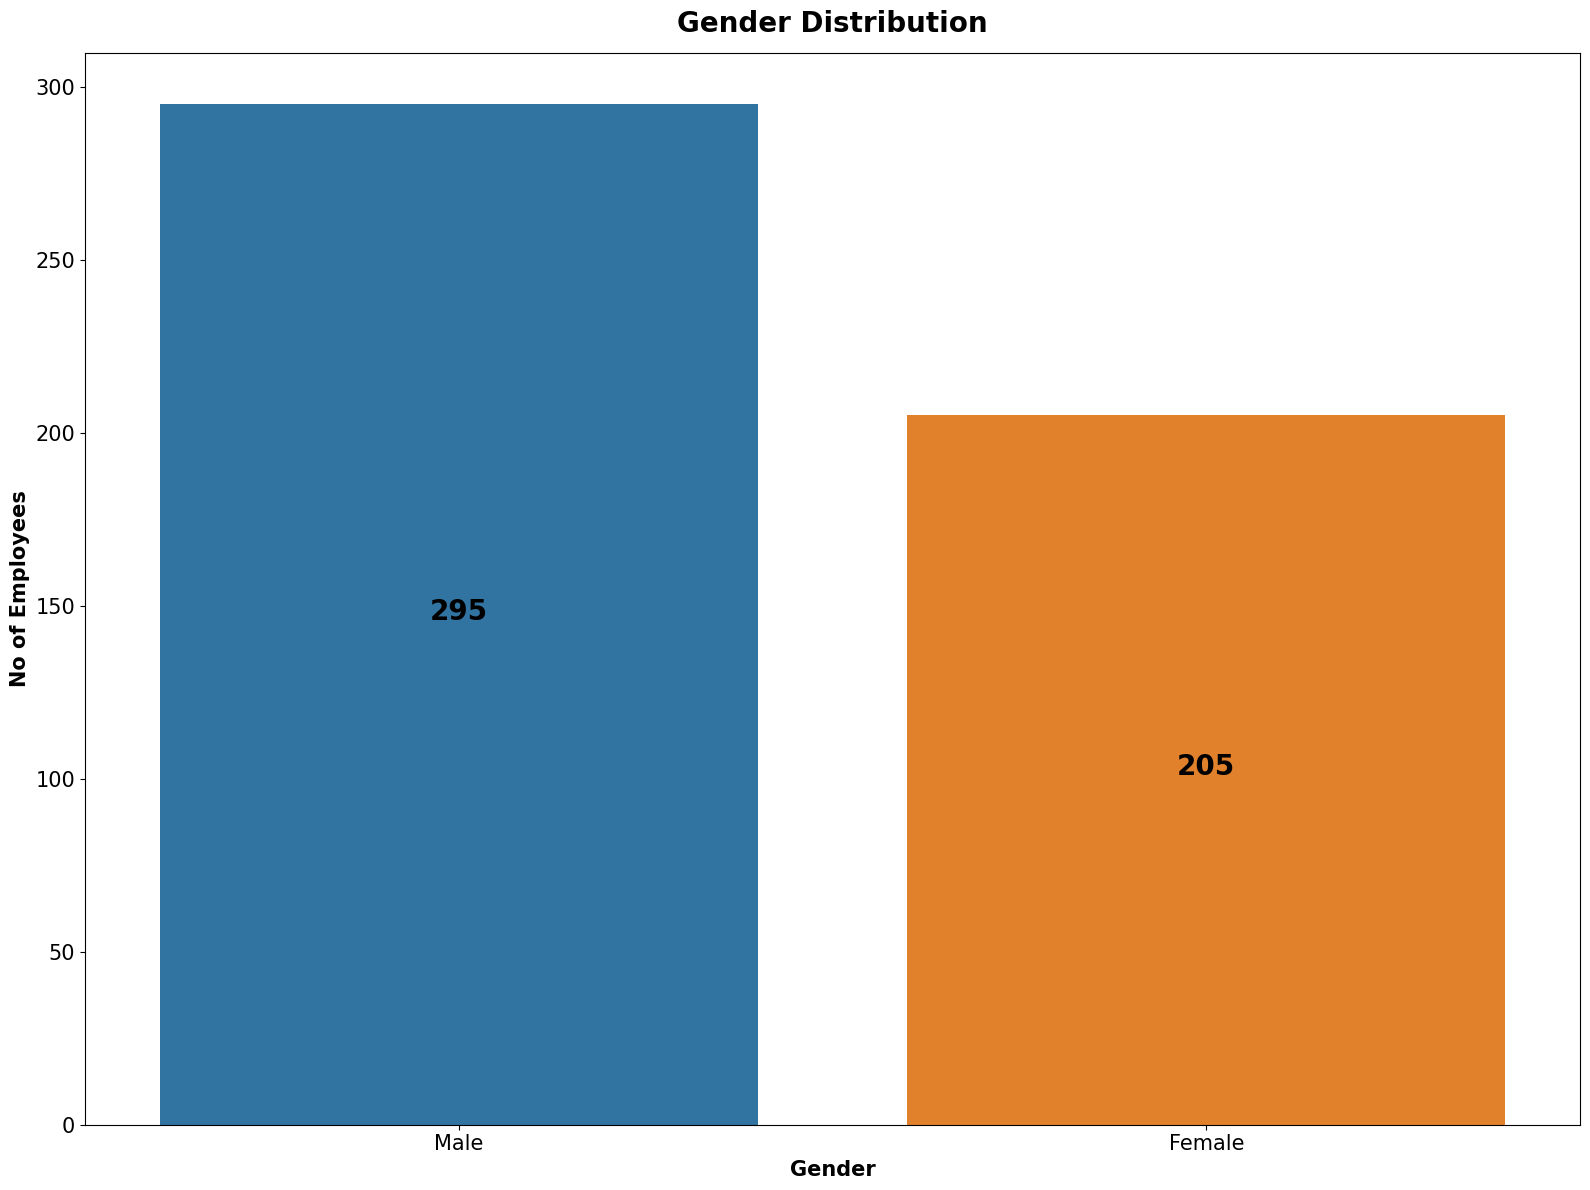

In [9]:
#Gender Distribution
plt.figure(figsize=(16,12))
ax=sns.countplot(data=df, x='Gender', hue='Gender')

plt.title("Gender Distribution",fontweight="bold",fontsize=20,pad=15)
plt.xlabel("Gender", fontweight="bold", fontsize=15)
plt.ylabel("No of Employees", fontweight="bold", fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

for i in ax.containers:
    ax.bar_label(i, fmt="%d", label_type="center", fontsize=20, fontweight="bold", padding=2)

plt.tight_layout()
plt.savefig('Gender Distribution.png')
plt.show()

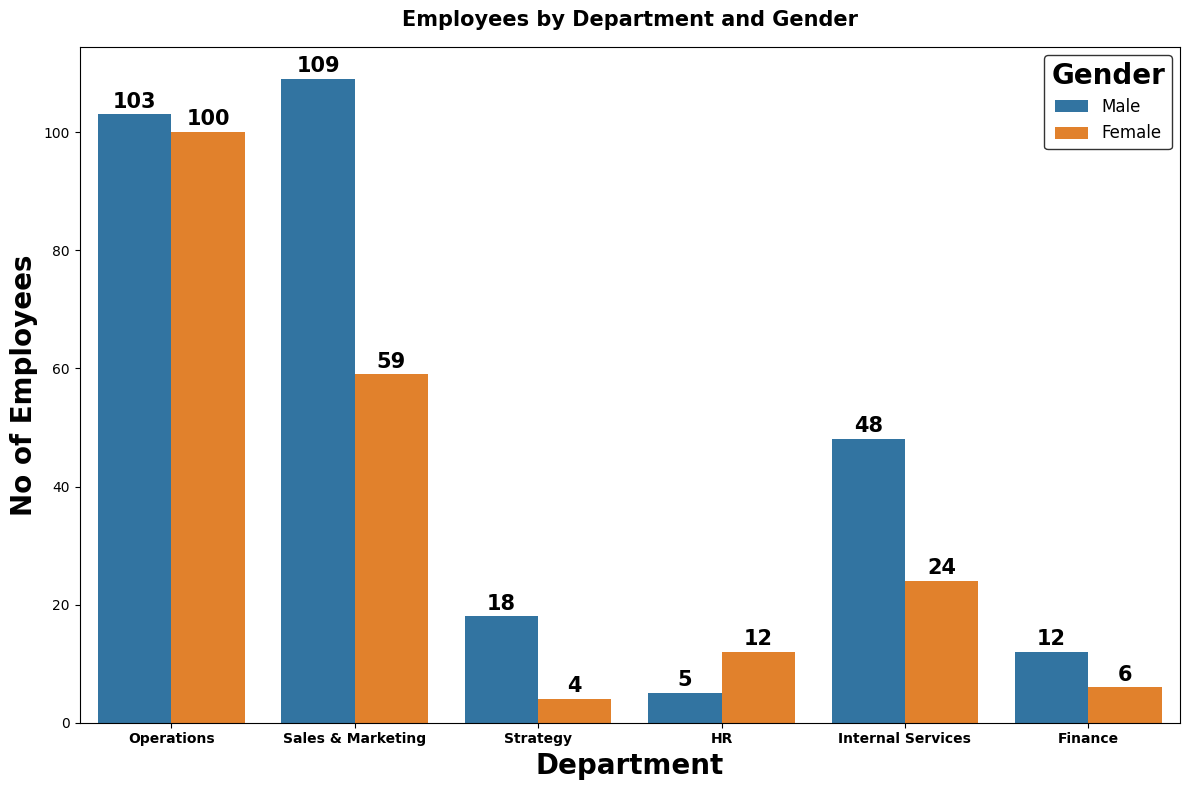

In [10]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df, x='Department @01.07.2020', hue='Gender')

plt.title("Employees by Department and Gender", fontweight="bold", fontsize=15, pad=15)
plt.xlabel("Department", fontweight="bold", fontsize=20)
plt.ylabel("No of Employees", fontweight="bold", fontsize=20)

plt.xticks(fontsize=10, fontweight="bold")

legend = plt.legend(title="Gender",fontsize=12,frameon=True,edgecolor="black",facecolor="white",loc="upper right")
plt.setp(legend.get_title(), fontweight="bold", fontsize=20)
for i in ax.containers:
    ax.bar_label(i, fmt="%d", label_type="edge", fontsize=15, fontweight="bold", padding=2)

plt.tight_layout()
plt.savefig("Employees_by_Department_and_Gender.png", dpi=300, bbox_inches="tight")
plt.show()

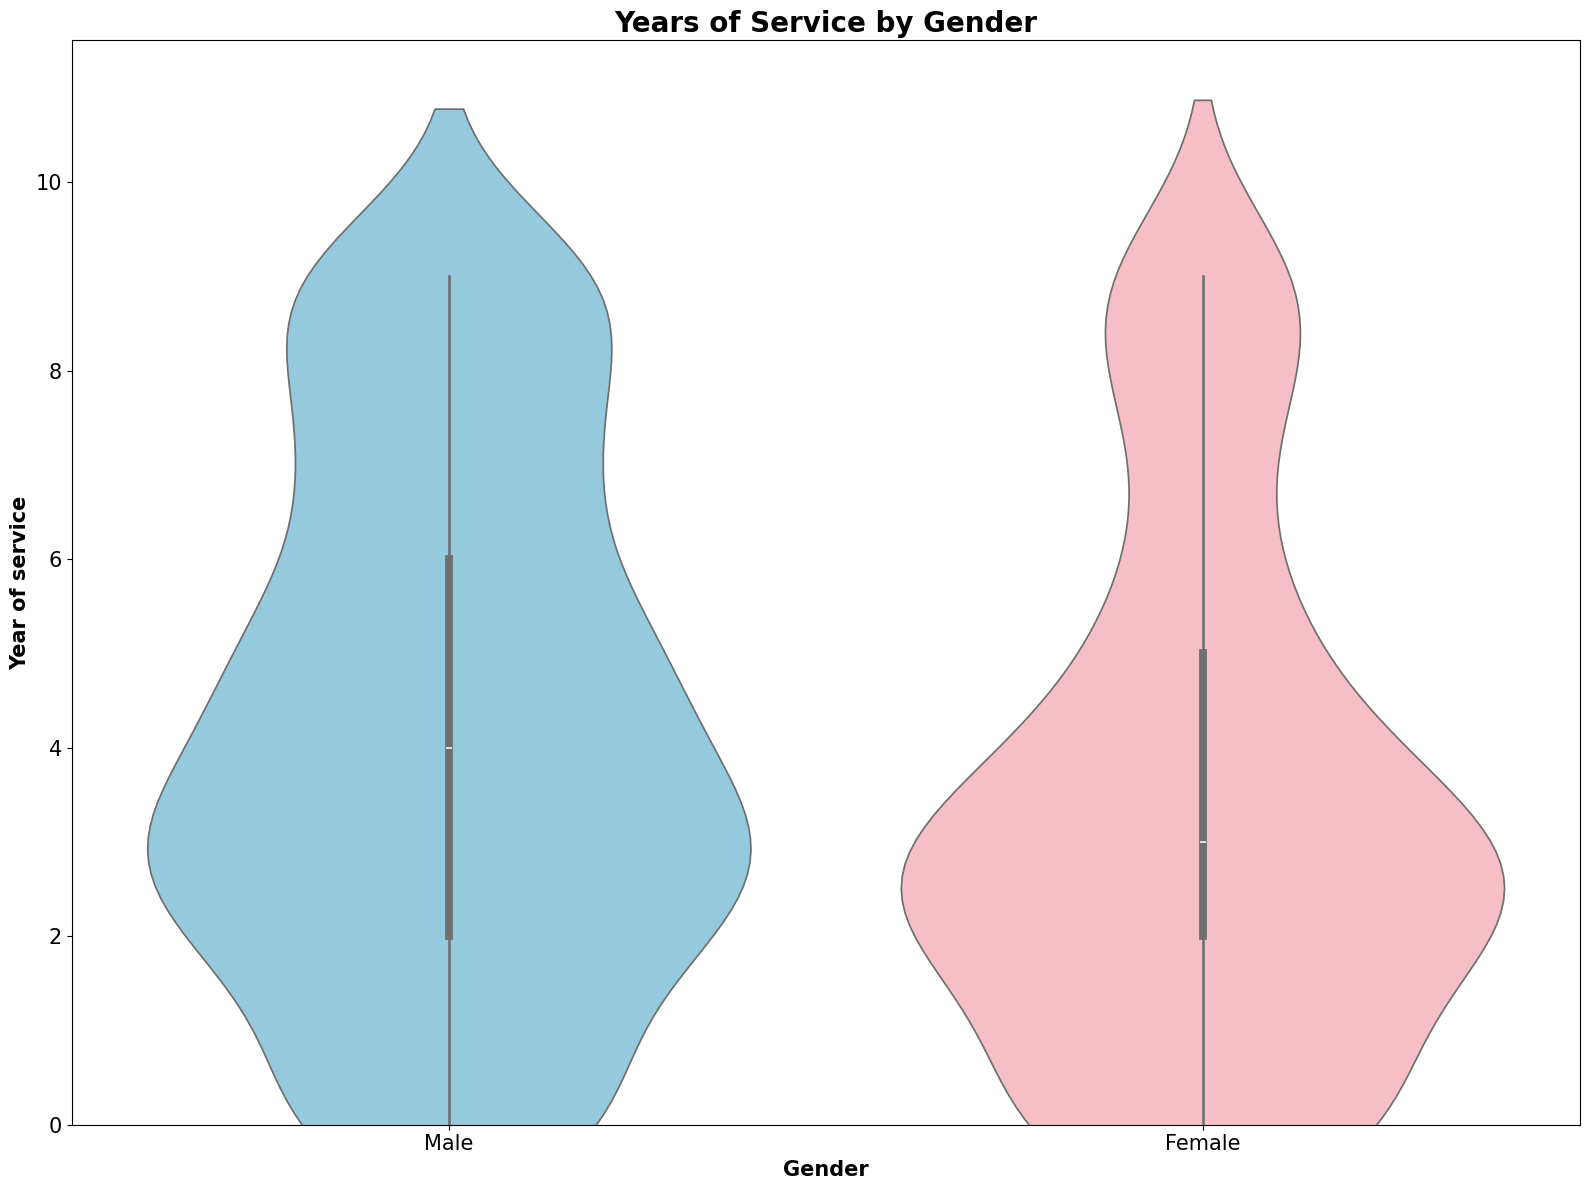

In [11]:
# Year of service Vs Gender
plt.figure(figsize=(16,12))
sns.violinplot(data=df, x="Gender", y="Years since last hire",hue="Gender", palette=["skyblue","lightpink"])

plt.xlabel("Gender",fontweight="bold", fontsize=15)
plt.ylabel("Year of service",fontweight="bold", fontsize=15)
plt.title("Years of Service by Gender",fontweight="bold",fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0)

plt.tight_layout()
plt.savefig('Years of Service by Gender.png')
plt.show()

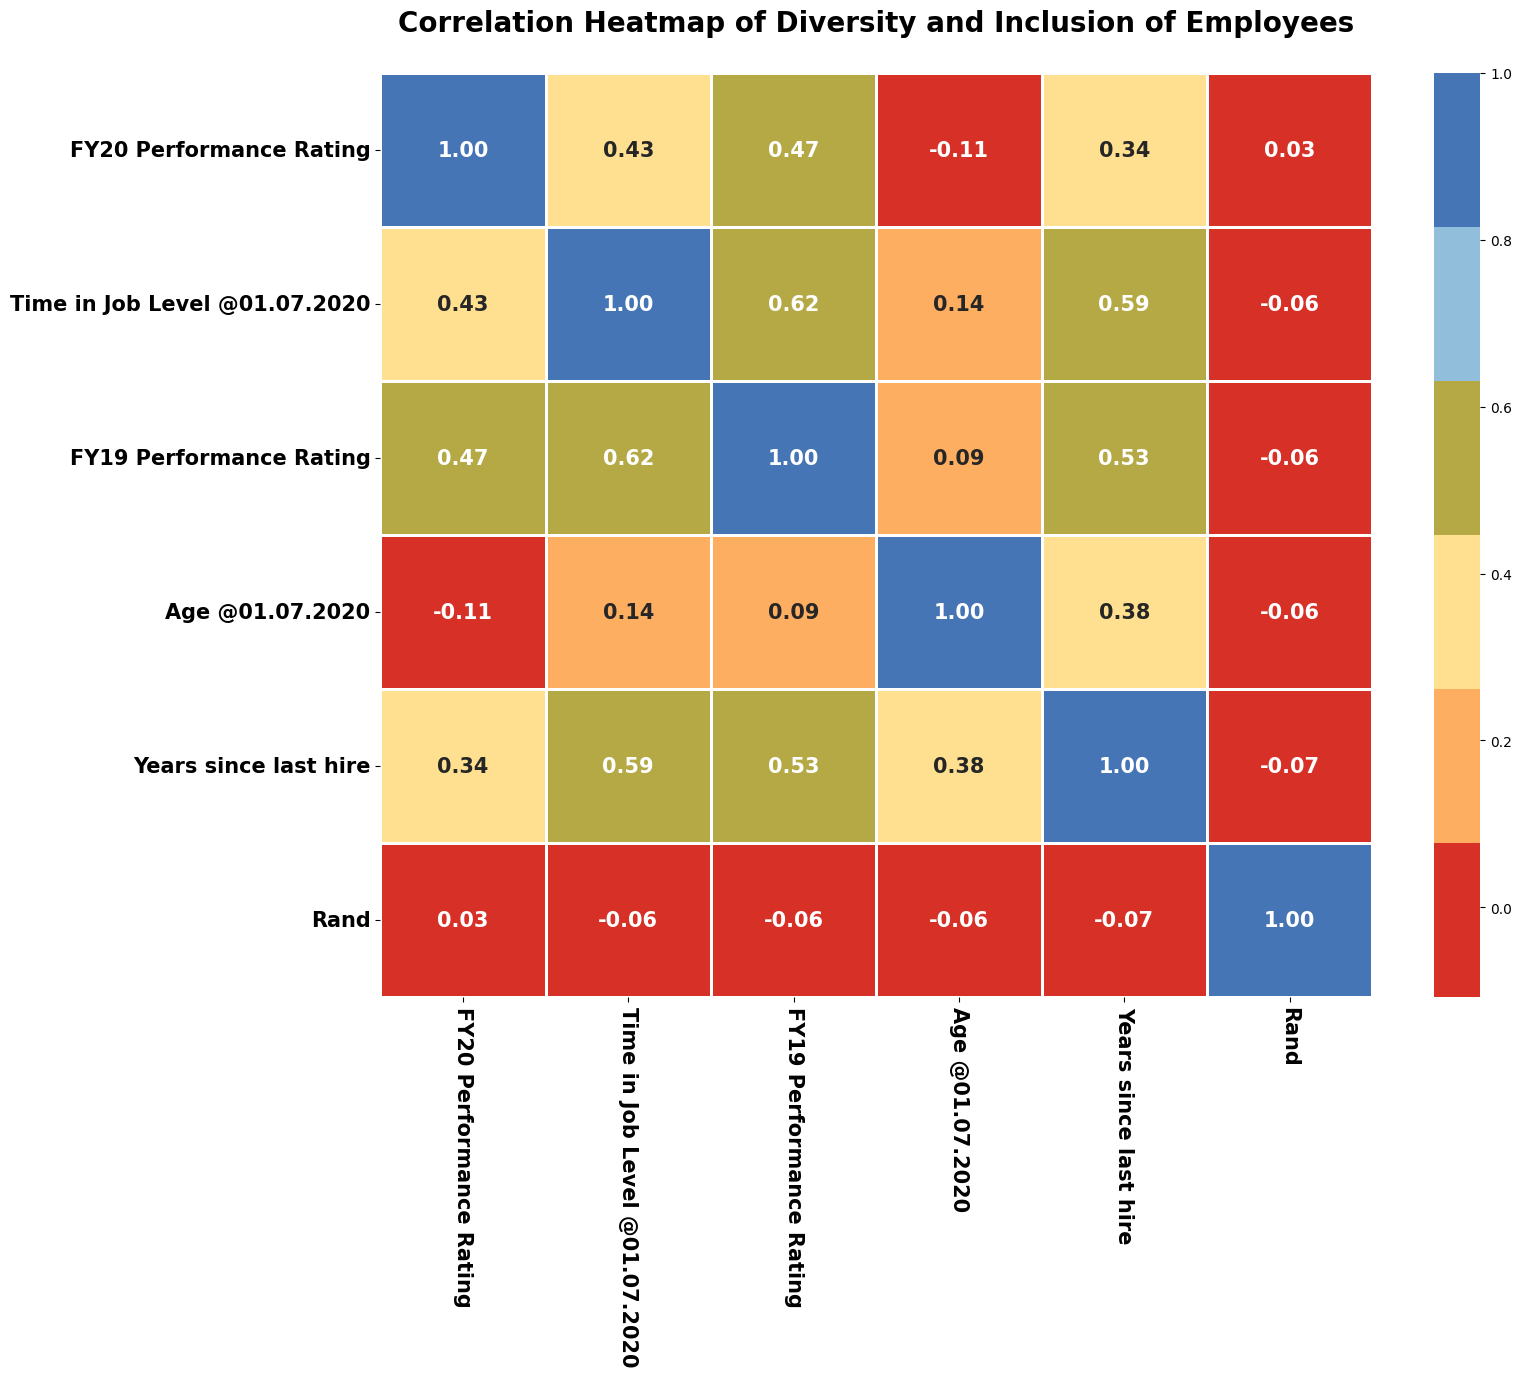

In [12]:
numeric_val = df.select_dtypes(include=["int64","float64"]).columns.tolist()
numeric_val.remove('Employee ID')
numeric_val.remove('Target hire balance')

corr = df[numeric_val].corr()

colors = ["#d73027", "#fdae61", "#fee090", "#b4a945", "#91bfdb", "#4575b4"]
cmap = mcol.ListedColormap(colors)

plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True,cmap=cmap, fmt=".2f", linewidths=1,annot_kws={"fontweight": "bold", "fontsize": 15})
plt.title('Correlation Heatmap of Diversity and Inclusion of Employees',pad=30,fontweight="bold",
    fontsize=20)

plt.xticks(rotation=270, fontsize=15, fontweight="bold")
plt.yticks(fontsize=15, fontweight="bold")
square=True

plt.savefig("Correlation_Heatmap_Diversity_Inclusion.png",dpi=300,bbox_inches='tight',pad_inches=0.5)
plt.show()